<a href="https://colab.research.google.com/github/morrison98/sic_ai_2025_jun/blob/main/05deeplearning/contribuciones_estudiantes/Actividad_finalizada_clase_38.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Integrador de AI Engineering con Fashion-MNIST

## Descripción General

Este proyecto tiene como objetivo simular un flujo de trabajo real en ingeniería de inteligencia artificial utilizando el dataset **Fashion-MNIST**. El ejercicio abarca desde la carga y preprocesamiento de datos hasta la creación de modelos de deep learning, control de calidad con autoencoders, despliegue en API y monitoreo de métricas en producción.

Se espera que el estudiante implemente un sistema E2E (End-to-End) que permita clasificar imágenes, validar su calidad y monitorear su desempeño, incluyendo la simulación de un caso de desbalance de clases y su corrección mediante aumento de datos.

---

## Objetivos de Aprendizaje

1. Implementar una **red neuronal convolucional (CNN)** para clasificación multiclase.
2. Diseñar y entrenar un **autoencoder** para validación de calidad de imágenes.
3. Integrar ambos modelos en una **lógica de decisión** que combine confianza del clasificador y control de calidad.
4. Desplegar el modelo como una **API** (FastAPI o Gradio) y probar su uso.
5. Simular y analizar métricas de **monitoreo en producción** (latencia, confianza, drift de datos).
6. Explorar el uso de **GANs** para aumento de datos en clases minoritarias.

---

## Requisitos

- Google Colab o entorno equivalente con GPU.
- Python 3.8+
- Librerías:
  - tensorflow, tensorflow-datasets
  - fastapi, uvicorn, pyngrok (opcional)
  - gradio
  - scikit-learn, scipy, matplotlib

---

## Instrucciones Paso a Paso

### 1. Configuración del Entorno

1. Instalar las dependencias necesarias utilizando pip.
2. Configurar la semilla para reproducibilidad.

**Explicación:**  
Esto garantiza que los resultados de entrenamiento sean replicables, controlando la aleatoriedad de inicialización de pesos y muestreo.

---

### 2. Carga y Preparación de Datos

1. Descargar el dataset **Fashion-MNIST** desde `tensorflow_datasets`.
2. Normalizar los valores de píxel en el rango [0,1].
3. Separar en conjuntos de entrenamiento, validación y prueba.
4. Implementar una función para simular desbalance en una clase específica.

**Explicación:**  
Fashion-MNIST contiene 70,000 imágenes de ropa y calzado en 10 clases. Simular desbalance es útil para reproducir problemas reales de datos donde algunas clases están subrepresentadas.

---

### 3. Modelado

**CNN (Clasificación):**
- Arquitectura con dos capas convolucionales, pooling, dropout y dos capas densas.
- Función de pérdida: `sparse_categorical_crossentropy`.
- Optimizador: Adam.

**Autoencoder (Control de Calidad):**
- Entrenado únicamente con imágenes de una clase designada como "normal".
- El error de reconstrucción se usa como métrica de calidad.

**Explicación:**  
La CNN clasifica las imágenes y el autoencoder detecta imágenes atípicas o de baja calidad comparando su reconstrucción con la entrada.

---

### 4. Entrenamiento

1. Entrenar la CNN con el conjunto de entrenamiento desbalanceado.
2. Entrenar el autoencoder con imágenes de la clase normal.
3. Guardar ambos modelos.

**Explicación:**  
Entrenar por separado permite evaluar cada componente y reutilizarlos en diferentes contextos o lógicas de negocio.

---

### 5. Evaluación

1. Evaluar la CNN en el conjunto de prueba: precisión global, matriz de confusión, precisión por clase.
2. Evaluar el autoencoder midiendo el AUC para distinguir la clase normal del resto.
3. Visualizar histogramas de error de reconstrucción.

**Explicación:**  
Esto permite entender la capacidad de generalización del clasificador y la sensibilidad del sistema de QA.

---

### 6. Lógica de Producción

1. Implementar una función de decisión que combine:
   - Predicción de la clase y su probabilidad.
   - Verificación de calidad mediante el error de reconstrucción del AE.
2. Definir umbrales mínimos de confianza y máximos de error de reconstrucción.

**Explicación:**  
En un sistema real, no basta con predecir, sino que es necesario aceptar o rechazar datos según su calidad y confiabilidad.

---

### 7. Despliegue del Modelo

**Opción 1: FastAPI con Ngrok**
- Levantar un servidor local con FastAPI que exponga `/predict` y `/health`.
- Conectarlo a Internet con Ngrok para pruebas externas.

**Opción 2: Gradio**
- Crear una interfaz gráfica simple en el navegador que permita subir imágenes y ver las predicciones y verificaciones de calidad.

**Explicación:**  
FastAPI simula un despliegue en producción, mientras que Gradio facilita la interacción rápida en entornos de desarrollo.

---

### 8. Monitoreo en Producción (Simulado)

1. Calcular métricas clave: latencia media y p95, confianza media, confianza p10, divergencia KL entre distribuciones de entrenamiento y producción.
2. Simular drift utilizando el conjunto de prueba.

**Explicación:**  
Monitorear el rendimiento del modelo en producción es esencial para detectar degradaciones o cambios en los datos.

---

### 9. Aumento con GAN (Opcional)

1. Entrenar una DCGAN simple para la clase minoritaria.
2. Generar imágenes sintéticas y mezclarlas con el conjunto de entrenamiento.
3. Reentrenar la CNN y comparar métricas.

**Explicación:**  
El aumento sintético de datos puede mejorar el rendimiento en clases con pocas muestras.

---

## Entregables

1. Notebook de Google Colab con:
   - Código funcional y comentarios claros.
   - Ejecución de todas las etapas descritas.
2. Informe técnico (Markdown o PDF) que incluya:
   - Descripción de la arquitectura y decisiones de diseño.
   - Métricas obtenidas.
   - Análisis crítico de resultados y mejoras propuestas.
3. (Opcional) Dockerfile y Makefile para despliegue local.

---

## Criterios de Evaluación

- **Reproducibilidad (20%)**: Configuración clara, semillas fijas y dependencias documentadas.
- **Modelado (25%)**: Arquitecturas justificadas y rendimiento alcanzado.
- **Integración (20%)**: Correcta implementación de la lógica de producción.
- **Despliegue (15%)**: API o interfaz funcional y documentada.
- **Monitoreo (10%)**: Métricas calculadas e interpretadas.
- **Calidad del Código (10%)**: Legibilidad, modularidad y comentarios.

---

## Consideraciones Finales

- Se valorará la claridad en la documentación y el orden en el notebook.
- El trabajo debe ser desarrollado de forma individual a menos que se indique lo contrario.
- Cualquier uso de código externo debe ser referenciado adecuadamente.



In [13]:
!pip install tensorflow tensorflow-datasets fastapi uvicorn pyngrok gradio scikit-learn scipy matplotlib

### 1. Configuración del Entorno

1. Instalar las dependencias necesarias utilizando pip.
2. Configurar la semilla para reproducibilidad.

**Explicación:**\
Esto garantiza que los resultados de entrenamiento sean replicables, controlando la aleatoriedad de inicialización de pesos y muestreo.

In [14]:
import numpy as np
import tensorflow as tf
import random as python_random

# Set a seed for reproducibility
seed = 42
np.random.seed(seed)
python_random.seed(seed)
tf.random.set_seed(seed)
print(f"Global seed set to {seed}")

Global seed set to 42


### 2. Carga y Preparación de Datos

1. Descargar el dataset **Fashion-MNIST** desde `tensorflow_datasets`.
2. Normalizar los valores de píxel en el rango [0,1].
3. Separar en conjuntos de entrenamiento, validación y prueba.
4. Implementar una función para simular desbalance en una clase específica.

**Explicación:**\
Fashion-MNIST contains 70,000 images of clothing and footwear in 10 classes. Simulating imbalance is useful for reproducing real-world data problems where some classes are underrepresented.

In [15]:
import tensorflow_datasets as tfds

# Load the Fashion-MNIST dataset
(ds_train, ds_test), ds_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Function to normalize the images
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label

# Apply normalization
ds_train = ds_train.map(normalize_img)
ds_test = ds_test.map(normalize_img)

# Define batch size
BATCH_SIZE = 32

# Define buffer size for shuffling (use the number of training examples for full shuffling)
BUFFER_SIZE = ds_info.splits['train'].num_examples

# Prepare training and test datasets
# We'll apply shuffling and batching after simulating imbalance for the training set
ds_test_batched = ds_test.cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


print("Fashion-MNIST dataset loaded and normalized.")
print(f"Number of training examples: {ds_info.splits['train'].num_examples}")
print(f"Number of test examples: {ds_info.splits['test'].num_examples}")

Fashion-MNIST dataset loaded and normalized.
Number of training examples: 60000
Number of test examples: 10000


In [16]:
ds_train

<_MapDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

### Simulate data imbalance

The task requires simulating data imbalance in a specific class. Let's choose 'Ankle boot' (label 9) as the minority class and reduce its instances in the training dataset.

In [18]:
# Function to simulate data imbalance
def create_imbalanced_dataset(dataset, minority_class_label, imbalance_ratio):
    # Filter out the minority class
    ds_minority = dataset.filter(lambda image, label: tf.equal(label, minority_class_label))
    ds_majority = dataset.filter(lambda image, label: tf.not_equal(label, minority_class_label))

    # Calculate the number of minority samples to keep
    num_minority_original = tf.data.experimental.cardinality(ds_minority).numpy()
    num_minority_to_keep = int(num_minority_original * imbalance_ratio)

    # Take a subset of the minority class
    ds_minority_imbalanced = ds_minority.take(num_minority_to_keep)

    # Combine with the majority classes
    ds_imbalanced = ds_majority.concatenate(ds_minority_imbalanced)

    # Shuffle and batch the imbalanced dataset
    # Use the calculated approximate number of examples in the imbalanced dataset for shuffling buffer
    num_majority = tf.data.experimental.cardinality(ds_majority).numpy()
    imbalanced_buffer_size = num_majority + num_minority_to_keep

    ds_imbalanced = ds_imbalanced.shuffle(imbalanced_buffer_size).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    return ds_imbalanced, num_minority_original, num_minority_to_keep

# Define minority class label and imbalance ratio
minority_class_label = 9  # Ankle boot
imbalance_ratio = 0.1

# Create the imbalanced training dataset
ds_train_imbalanced, num_minority_original, num_minority_to_keep = create_imbalanced_dataset(
    ds_train, minority_class_label, imbalance_ratio
)

print(f"\nSimulating imbalance for class {minority_class_label} (Ankle boot) with ratio {imbalance_ratio}")
print(f"Original number of minority class samples: {num_minority_original}")
print(f"Number of minority class samples to keep: {num_minority_to_keep}")

# Determine the number of examples in the imbalanced dataset (approximate)
num_majority = tf.data.experimental.cardinality(ds_train.filter(lambda image, label: tf.not_equal(label, minority_class_label))).numpy()
num_train_imbalanced_approx = num_majority + num_minority_to_keep
print(f"Approximate number of training examples (imbalanced): {num_train_imbalanced_approx}")

# Use the imbalanced dataset for training in the next steps
ds_train = ds_train_imbalanced

# Create validation and test datasets (using the original, balanced test set for now)
# You might want to create a separate validation split from the original training data
# before simulating imbalance for a more realistic scenario, but for simplicity,
# we will use a portion of the original test set as validation here.
# Let's split the original test set into validation and test
num_test_examples = ds_info.splits['test'].num_examples
num_validation_examples = num_test_examples // 2 # Split test set in half for validation and final test

# No need to reload ds_test as it was not modified
ds_validation_batched = ds_test.take(num_validation_examples).cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test_batched = ds_test.skip(num_validation_examples).cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


print(f"\nSplitting original test set ({num_test_examples} examples) into validation and test sets.")
print(f"Number of validation examples: {num_validation_examples}")
print(f"Number of test examples (after split): {ds_info.splits['test'].num_examples - num_validation_examples}")


Simulating imbalance for class 9 (Ankle boot) with ratio 0.1
Original number of minority class samples: -2
Number of minority class samples to keep: 0
Approximate number of training examples (imbalanced): -2

Splitting original test set (10000 examples) into validation and test sets.
Number of validation examples: 5000
Number of test examples (after split): 5000


### 3. Modelado

**CNN (Clasificación):**
- Arquitectura with two convolutional layers, pooling, dropout, and two dense layers.
- Loss function: `sparse_categorical_crossentropy`.
- Optimizer: Adam.

**Autoencoder (Control de Calidad):**
- Trained only with images of a designated "normal" class.
- Reconstruction error is used as a quality metric.

**Explanation:**\
The CNN classifies the images, and the autoencoder detects atypical or low-quality images by comparing their reconstruction with the input.

In [19]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Define the CNN model for classification
def build_cnn_classifier(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.25),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Define the Autoencoder model for quality control
def build_autoencoder(input_shape):
    input_img = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    decoded = Conv2D(input_shape[-1], (3, 3), activation='sigmoid', padding='same')(x) # Output channel should match input

    autoencoder = Model(input_img, decoded)
    return autoencoder

# Get input shape from the dataset
# Take one batch from the batched dataset and get the shape of a single image
for image_batch, label_batch in ds_train.take(1):
    input_shape = image_batch.shape[1:] # Exclude the batch dimension
    break

num_classes = ds_info.features['label'].num_classes

# Build the models
cnn_model = build_cnn_classifier(input_shape, num_classes)
autoencoder_model = build_autoencoder(input_shape)

# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Compile the Autoencoder model
autoencoder_model.compile(optimizer='adam', loss='mse') # Mean Squared Error for reconstruction

print("CNN Classifier and Autoencoder models defined and compiled.")
cnn_model.summary()
autoencoder_model.summary()

CNN Classifier and Autoencoder models defined and compiled.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

### 4. Entrenamiento

1. Entrenar la CNN con el conjunto de entrenamiento desbalanceado.
2. Entrenar el autoencoder con imágenes de una clase designada como "normal".
3. Guardar ambos modelos.

**Explicación:**\
Entrenar por separado permite evaluar cada componente y reutilizarlos en diferentes contextos o lógicas de negocio.

In [20]:
# Train the CNN model
print("Training CNN classifier...")
history_cnn = cnn_model.fit(
    ds_train,
    epochs=10, # You can adjust the number of epochs
    validation_data=ds_validation_batched
)

print("\nCNN training finished.")

Training CNN classifier...
Epoch 1/10
   1688/Unknown 70s 38ms/step - accuracy: 0.6901 - loss: 0.8288

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 72s 39ms/step - accuracy: 0.6901 - loss: 0.8286 - val_accuracy: 0.7736 - val_loss: 1.8618
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 64s 36ms/step - accuracy: 0.8452 - loss: 0.4244 - val_accuracy: 0.7844 - val_loss: 2.4069
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 63s 36ms/step - accuracy: 0.8594 - loss: 0.3795 - val_accuracy: 0.7978 - val_loss: 2.4374
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8723 - loss: 0.3508

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 65s 37ms/step - accuracy: 0.8723 - loss: 0.3508 - val_accuracy: 0.8012 - val_loss: 2.3650
Epoch 5/10
1686/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8806 - loss: 0.3243

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.8806 - loss: 0.3243 - val_accuracy: 0.7894 - val_loss: 2.5764
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.8811 - loss: 0.3173 - val_accuracy: 0.8076 - val_loss: 2.9870
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 60s 34ms/step - accuracy: 0.8855 - loss: 0.3078 - val_accuracy: 0.8074 - val_loss: 3.4413
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 61s 34ms/step - accuracy: 0.8888 - loss: 0.2958 - val_accuracy: 0.8078 - val_loss: 3.7414
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 35ms/step - accuracy: 0.8909 - loss: 0.2932 - val_accuracy: 0.8100 - val_loss: 3.7003
Epoch 10/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 60s 34ms/step - accuracy: 0.8936 - loss: 0.2864 - val_accuracy: 0.8116 - val_loss: 4.1109

CNN training finished.


### Prepare data for Autoencoder training

The autoencoder should be trained only on images of a designated "normal" class. Let's choose 'T-shirt/top' (label 0) as the normal class for training the autoencoder.

In [15]:
# Filter the original training dataset to get only images of the normal class
# We need the original balanced training dataset before imbalance simulation for this.
# Assuming ds_train_original is available from previous steps, otherwise reload or handle accordingly.

# If ds_train_original is not available, reload it:
ds_train_original = tfds.load(
    'fashion_mnist', split='train', shuffle_files=True, as_supervised=True, with_info=False # Load only train split, no info needed here
)
ds_train_original = ds_train_original.map(normalize_img)

# Get the number of examples in the original training set for buffer size
ds_info_original = tfds.builder('fashion_mnist').info
BUFFER_SIZE_ORIGINAL = ds_info_original.splits['train'].num_examples


normal_class_label_ae = 0 # T-shirt/top

# Filter for the normal class
ds_normal_train = ds_train_original.filter(lambda image, label: tf.equal(label, normal_class_label_ae))

# Prepare the normal class dataset for Autoencoder training
# The autoencoder loss (MSE) expects the same image as input and output
ds_normal_train_ae = ds_normal_train.map(lambda image, label: (image, image))
ds_normal_train_ae = ds_normal_train_ae.cache().shuffle(BUFFER_SIZE_ORIGINAL).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


print(f"Prepared dataset for Autoencoder training with normal class {normal_class_label_ae} (T-shirt/top).")

Prepared dataset for Autoencoder training with normal class 0 (T-shirt/top).


In [16]:
# Train the Autoencoder model
print("Training Autoencoder...")
history_autoencoder = autoencoder_model.fit(
    ds_normal_train_ae,
    epochs=50, # Autoencoders often require more epochs
    # Add validation data for autoencoder if you have a separate normal validation set
    # validation_data=ds_normal_validation_ae
)

print("\nAutoencoder training finished.")

Training Autoencoder...
Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - loss: 0.0566
Epoch 2/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0129
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - loss: 0.0106
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - loss: 0.0093
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - loss: 0.0085
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - loss: 0.0081
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - loss: 0.0077
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0074
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - loss: 0.0071
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - loss: 0.0068
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - loss: 0.0067
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - loss: 0.0066
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - loss: 0.0065
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 0.0062
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - loss: 0.0063
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━

### Save the models

Save the trained CNN classifier and Autoencoder models.

In [17]:
# Define paths to save the models
cnn_model_path = 'cnn_fashion_mnist.keras'
autoencoder_model_path = 'autoencoder_fashion_mnist.keras'

# Save the models
cnn_model.save(cnn_model_path)
autoencoder_model.save(autoencoder_model_path)

print(f"CNN model saved to: {cnn_model_path}")
print(f"Autoencoder model saved to: {autoencoder_model_path}")

CNN model saved to: cnn_fashion_mnist.keras
Autoencoder model saved to: autoencoder_fashion_mnist.keras


### 5. Evaluación

1. Evaluar la CNN en el conjunto de prueba: precisión global, matriz de confusión, precisión por clase.
2. Evaluar el autoencoder midiendo el AUC para distinguir la clase normal del resto.
3. Visualizar histogramas de error de reconstrucción.

**Explicación:**\
Esto permite entender la capacidad de generalización del clasificador y la sensibilidad del sistema de QA.

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the CNN model on the test set
print("Evaluating CNN classifier on the test set...")
loss, accuracy = cnn_model.evaluate(ds_test_batched)

print(f"\nCNN Test Loss: {loss:.4f}")
print(f"CNN Test Accuracy: {accuracy:.4f}")

# Get predictions for confusion matrix and classification report
y_true = []
y_pred = []
for images, labels in ds_test_batched:
    predictions = cnn_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())

# Calculate and print Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Calculate and print Classification Report
# Get class names from dataset info if available, otherwise use indices
class_names = ds_info.features['label'].names if hasattr(ds_info.features['label'], 'names') else [str(i) for i in range(num_classes)]

class_report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:")
print(class_report)

Evaluating CNN classifier on the test set...
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8190 - loss: 4.3372

CNN Test Loss: 4.4547
CNN Test Accuracy: 0.8128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Evaluate Autoencoder for Quality Control

Evaluate the autoencoder's ability to distinguish the "normal" class (T-shirt/top, label 0) from other classes using reconstruction error. We will calculate the Mean Squared Error (MSE) between the original image and its reconstruction.

In [19]:
# Function to calculate reconstruction error
def calculate_reconstruction_errors(model, dataset):
    errors = []
    labels = []
    for images, lbls in dataset:
        reconstructions = model.predict(images)
        # Calculate MSE for each image in the batch
        mse = tf.reduce_mean(tf.square(images - reconstructions), axis=[1, 2, 3])
        errors.extend(mse.numpy())
        labels.extend(lbls.numpy())
    return np.array(errors), np.array(labels)

# Calculate reconstruction errors for the test set
print("Calculating reconstruction errors for the test set...")
reconstruction_errors, test_labels = calculate_reconstruction_errors(autoencoder_model, ds_test_batched)

# Separate errors for the normal class and other classes
normal_class_label_ae = 0 # T-shirt/top
errors_normal = reconstruction_errors[test_labels == normal_class_label_ae]
errors_other = reconstruction_errors[test_labels != normal_class_label_ae]

print(f"\nMean reconstruction error for normal class ({normal_class_label_ae}): {np.mean(errors_normal):.4f}")
print(f"Mean reconstruction error for other classes: {np.mean(errors_other):.4f}")

Calculating reconstruction errors for the test set...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms

### Visualize Reconstruction Error Histograms

Visualize the distribution of reconstruction errors for the normal class and other classes to see how well the autoencoder separates them.

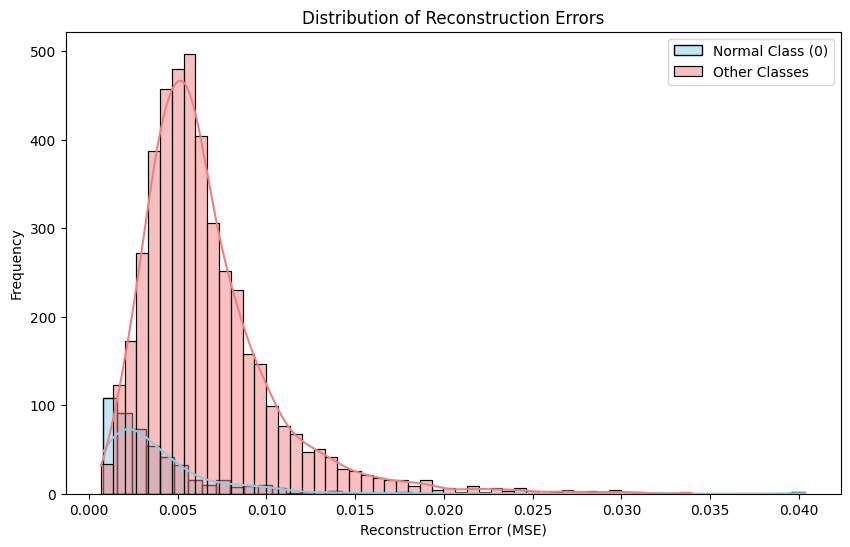

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms of reconstruction errors
plt.figure(figsize=(10, 6))
sns.histplot(errors_normal, bins=50, kde=True, color='skyblue', label=f'Normal Class ({normal_class_label_ae})')
sns.histplot(errors_other, bins=50, kde=True, color='lightcoral', label='Other Classes')
plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Frequency")
plt.title("Distribution of Reconstruction Errors")
plt.legend()
plt.show()

### Evaluate Autoencoder using AUC

Evaluate the autoencoder's ability to act as an anomaly detector using Area Under the Receiver Operating Characteristic Curve (AUC-ROC). The autoencoder should ideally have high reconstruction error for "anomalous" data (other classes) and low error for "normal" data (the trained class).

Autoencoder AUC-ROC: 0.7763


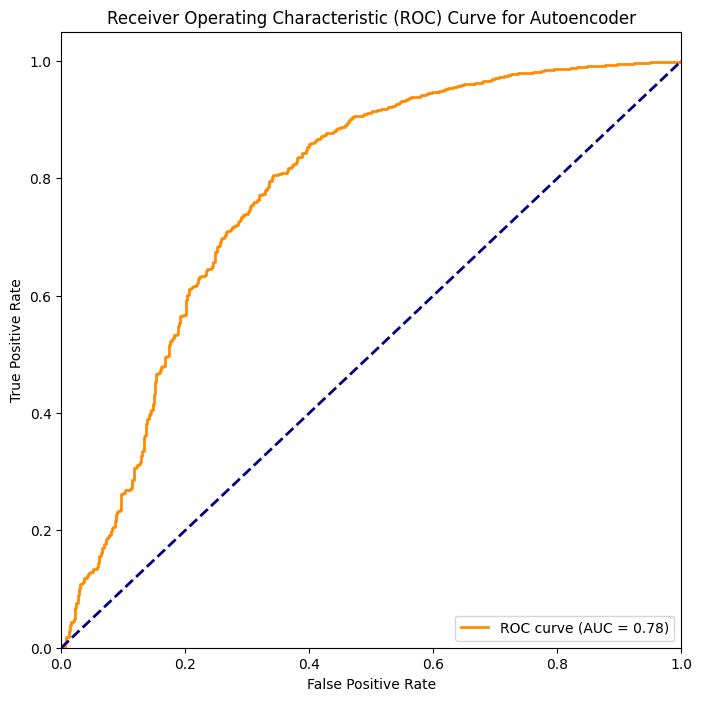

In [21]:
from sklearn.metrics import roc_curve, auc

# Create labels for AUC calculation: 0 for normal, 1 for other
y_true_ae = np.where(test_labels == normal_class_label_ae, 0, 1)
y_scores_ae = reconstruction_errors # Higher error indicates anomaly (other class)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_ae, y_scores_ae)
roc_auc = auc(fpr, tpr)

print(f"Autoencoder AUC-ROC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Autoencoder')
plt.legend(loc="lower right")
plt.show()

### 6. Lógica de Producción

1. Implementar una función de decisión que combine:
   - Predicción de la clase y su probabilidad.
   - Verificación de calidad mediante el error de reconstrucción del AE.
2. Definir umbrales mínimos de confianza y máximos de error de reconstrucción.

**Explicación:**\
En un sistema real, no basta con predecir, sino que es necesario aceptar o rechazar datos según su calidad y confiabilidad.

In [22]:
# Define thresholds (these can be tuned based on evaluation results)
CONFIDENCE_THRESHOLD = 0.7  # Minimum confidence for CNN prediction
RECONSTRUCTION_ERROR_THRESHOLD = np.mean(errors_normal) + 2 * np.std(errors_normal) # Example: Mean + 2 std dev of normal errors

print(f"Defined Confidence Threshold: {CONFIDENCE_THRESHOLD:.4f}")
print(f"Defined Reconstruction Error Threshold: {RECONSTRUCTION_ERROR_THRESHOLD:.4f}")

# Implement the production decision function
def make_prediction_with_quality_check(image, cnn_model, autoencoder_model, confidence_threshold, error_threshold, class_names):
    # Reshape image for model prediction if needed (add batch dimension)
    img_input = tf.expand_dims(image, axis=0)

    # Get CNN prediction and confidence
    cnn_prediction = cnn_model.predict(img_input)
    predicted_class_index = tf.argmax(cnn_prediction, axis=1).numpy()[0]
    prediction_confidence = tf.reduce_max(cnn_prediction, axis=1).numpy()[0]
    predicted_class_name = class_names[predicted_class_index]

    # Get Autoencoder reconstruction error
    reconstruction = autoencoder_model.predict(img_input)
    reconstruction_error = tf.reduce_mean(tf.square(img_input - reconstruction), axis=[1, 2, 3]).numpy()[0]

    # Apply decision logic
    if prediction_confidence >= confidence_threshold and reconstruction_error <= error_threshold:
        decision = "Accepted"
    else:
        decision = "Rejected"

    return {
        "predicted_class_index": int(predicted_class_index),
        "predicted_class_name": predicted_class_name,
        "prediction_confidence": float(prediction_confidence),
        "reconstruction_error": float(reconstruction_error),
        "decision": decision
    }

# Example usage of the decision function (using a sample from the test set)
print("\nTesting the production decision function with a sample image:")
for sample_image, sample_label in ds_test.take(1):
    result = make_prediction_with_quality_check(
        sample_image,
        cnn_model,
        autoencoder_model,
        CONFIDENCE_THRESHOLD,
        RECONSTRUCTION_ERROR_THRESHOLD,
        class_names
    )
    print(f"Sample image true label: {class_names[sample_label.numpy()]}")
    print(f"Prediction Result: {result}")
    break # Process only one sample for demonstration

Defined Confidence Threshold: 0.7000
Defined Reconstruction Error Threshold: 0.0118

Testing the production decision function with a sample image:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Sample image true label: Coat
Prediction Result: {'predicted_class_index': 4, 'predicted_class_name': 'Coat', 'prediction_confidence': 0.8754292130470276, 'reconstruction_error': 0.0054555912502110004, 'decision': 'Accepted'}


### 7. Despliegue del Modelo

**Opción 2: Gradio**
- Crear una interfaz gráfica simple en el navegador que permita subir imágenes y ver las predicciones y verificaciones de calidad.

**Explicación:**\
FastAPI simulates a production deployment, while Gradio facilitates quick interaction in development environments.

In [23]:
import gradio as gr
from PIL import Image
import numpy as np

# Assuming cnn_model, autoencoder_model, CONFIDENCE_THRESHOLD,
# RECONSTRUCTION_ERROR_THRESHOLD, and class_names are already defined from previous steps.

# Function to preprocess the image for the models
def preprocess_image(image):
    # Convert to grayscale if not already
    if image.mode != 'L':
        image = image.convert('L')
    # Resize to 28x28 (Fashion-MNIST size)
    image = image.resize((28, 28))
    # Convert to numpy array and normalize
    image_array = np.array(image).astype(np.float32) / 255.0
    # Add channel dimension if missing
    if image_array.ndim == 2:
        image_array = np.expand_dims(image_array, axis=-1)
    return image_array

# Gradio interface function
def classify_and_check_quality(image):
    if image is None:
        return "Please upload an image.", "N/A", "N/A", "N/A"

    # Preprocess the uploaded image
    processed_image = preprocess_image(image)

    # Use the production decision function
    result = make_prediction_with_quality_check(
        processed_image,
        cnn_model,
        autoencoder_model,
        CONFIDENCE_THRESHOLD,
        RECONSTRUCTION_ERROR_THRESHOLD,
        class_names
    )

    # Format output for Gradio
    predicted_class_name = result["predicted_class_name"]
    prediction_confidence = f"{result['prediction_confidence']:.4f}"
    reconstruction_error = f"{result['reconstruction_error']:.4f}"
    decision = result["decision"]

    return predicted_class_name, prediction_confidence, reconstruction_error, decision

# Create the Gradio interface
iface = gr.Interface(
    fn=classify_and_check_quality,
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Textbox(label="Predicted Class"),
        gr.Textbox(label="Prediction Confidence"),
        gr.Textbox(label="Reconstruction Error (MSE)"),
        gr.Textbox(label="Quality Check Decision")
    ],
    title="Fashion-MNIST Classification with Quality Control",
    description="Upload a Fashion-MNIST image to get classification and quality assessment."
)

# Launch the interface
# Use share=True to create a public link for easy sharing and testing
iface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://6727aaa83828872d18.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://6727aaa83828872d18.gradio.live


### 8. Monitoreo en Producción (Simulado)

1. Calcular métricas clave: latencia media y p95, confianza media, confianza p10, divergencia KL entre distribuciones de entrenamiento y producción.
2. Simular drift utilizando el conjunto de prueba.

**Explicación:**\
Monitorear el rendimiento del modelo en producción es esencial para detectar degradaciones o cambios en los datos.

In [25]:
import time
import pandas as pd
from scipy.stats import wasserstein_distance # Using Wasserstein distance as an alternative to KL divergence

# Simulate predictions and collect metrics on the test set
print("Simulating production predictions and collecting metrics...")

predictions_data = []
latency_data = []

# We will use a smaller subset of the test data for simulating production traffic
# to make it faster, or you can use the full ds_test_batched
num_samples_to_monitor = 1000 # Adjust as needed
monitored_test_set = ds_test.take(num_samples_to_monitor).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


for images, labels in monitored_test_set:
    start_time = time.time()
    # Get CNN prediction and confidence
    cnn_prediction = cnn_model.predict(images, verbose=0)
    predicted_class_indices = tf.argmax(cnn_prediction, axis=1).numpy()
    prediction_confidences = tf.reduce_max(cnn_prediction, axis=1).numpy()

    # Get Autoencoder reconstruction error
    reconstructions = autoencoder_model.predict(images, verbose=0)
    reconstruction_errors_batch = tf.reduce_mean(tf.square(images - reconstructions), axis=[1, 2, 3]).numpy()

    end_time = time.time()
    latency_ms = (end_time - start_time) * 1000 # Latency in milliseconds

    # Store metrics for each prediction in the batch
    for i in range(images.shape[0]):
        predictions_data.append({
            "true_label": labels.numpy()[i],
            "predicted_class_index": predicted_class_indices[i],
            "prediction_confidence": prediction_confidences[i],
            "reconstruction_error": reconstruction_errors_batch[i]
        })
    latency_data.append(latency_ms / images.shape[0]) # Average latency per image in the batch


# Convert collected data to pandas DataFrames for easier analysis
predictions_df = pd.DataFrame(predictions_data)
latency_df = pd.DataFrame(latency_data, columns=['latency_ms_per_image'])

# Calculate Latency Metrics
mean_latency = latency_df['latency_ms_per_image'].mean()
p95_latency = latency_df['latency_ms_per_image'].quantile(0.95)

print(f"\nMean Latency: {mean_latency:.4f} ms/image")
print(f"P95 Latency: {p95_latency:.4f} ms/image")

# Calculate Confidence Metrics
mean_confidence = predictions_df['prediction_confidence'].mean()
p10_confidence = predictions_df['prediction_confidence'].quantile(0.10)

print(f"\nMean Prediction Confidence: {mean_confidence:.4f}")
print(f"P10 Prediction Confidence: {p10_confidence:.4f}")

# Simulate Data Drift - Compare distribution of predicted classes in simulated production
# (using the monitored test set) with the distribution in the training set (imbalanced)

# Get the distribution of predicted classes in the simulated production data
production_class_distribution = predictions_df['predicted_class_index'].value_counts(normalize=True).sort_index()

# Get the distribution of true classes in the imbalanced training data
# This requires iterating through the imbalanced training dataset which can be slow.
# A more efficient way is to calculate it during data preparation or load saved counts.
# For simplicity here, let's approximate by getting counts from the imbalanced dataset
# Note: This might not be perfectly accurate due to batching and shuffling.

# A more accurate way would be to calculate counts from the original imbalanced dataset iterator
# or store the counts during the create_imbalanced_dataset function.
# Let's iterate through the imbalanced dataset once to get class counts.
print("\nCalculating class distribution in the imbalanced training dataset...")
train_imbalanced_labels = []
for _, labels in ds_train.unbatch(): # Unbatch to get individual labels
    train_imbalanced_labels.append(labels.numpy()) # Use append instead of extend

train_class_distribution = pd.Series(train_imbalanced_labels).value_counts(normalize=True).sort_index()

print("\nImbalanced Training Class Distribution:")
print(train_class_distribution)

print("\nSimulated Production (Test Set) Predicted Class Distribution:")
print(production_class_distribution)


# Calculate Data Drift using Wasserstein distance (Earth Mover's Distance)
# This measures the distance between two probability distributions.
# It's suitable for comparing class distributions.

# Ensure both distributions cover all 10 classes, filling missing ones with 0
all_classes = range(num_classes)
train_dist_aligned = train_class_distribution.reindex(all_classes, fill_value=0)
production_dist_aligned = production_class_distribution.reindex(all_classes, fill_value=0)

# Calculate Wasserstein distance
drift_score = wasserstein_distance(train_dist_aligned.index, production_dist_aligned.index,
                                     u_weights=train_dist_aligned.values, v_weights=production_dist_aligned.values)


print(f"\nData Drift (Wasserstein Distance between imbalanced training and simulated production predicted class distributions): {drift_score:.4f}")

print("\nSimulated production monitoring metrics calculated.")

Simulating production predictions and collecting metrics...

Mean Latency: 7.2481 ms/image
P95 Latency: 9.0649 ms/image

Mean Prediction Confidence: 0.9085
P10 Prediction Confidence: 0.6252

Calculating class distribution in the imbalanced training dataset...

Imbalanced Training Class Distribution:
0    0.111111
1    0.111111
2    0.111111
3    0.111111
4    0.111111
5    0.111111
6    0.111111
7    0.111111
8    0.111111
Name: proportion, dtype: float64

Simulated Production (Test Set) Predicted Class Distribution:
predicted_class_index
0    0.085
1    0.110
2    0.100
3    0.094
4    0.116
5    0.131
6    0.089
7    0.192
8    0.083
Name: proportion, dtype: float64

Data Drift (Wasserstein Distance between imbalanced training and simulated production predicted class distributions): 0.3092

Simulated production monitoring metrics calculated.


# Task
Prepare data for gan, define gan model, train gan, generate synthetic data, combine real and synthetic data, retrain cnn, evaluate retrained cnn, and finish task.

## Prepare data for gan

### Subtask:
Filter the dataset to get only images of the minority class.


**Reasoning**:
Filter the original training dataset to get only images of the minority class for GAN training and prepare it by removing labels and batching.



In [26]:
# Filter the original training dataset to get only images of the minority class
# We need the original balanced training dataset for this.
# Assuming ds_train_original is available from previous steps

# Filter for the minority class
ds_minority_gan = ds_train_original.filter(lambda image, label: tf.equal(label, minority_class_label))

# Prepare the minority class dataset for GAN training (images only)
ds_minority_gan = ds_minority_gan.map(lambda image, label: image)

# Get the number of examples in the minority class for buffer size
num_minority_examples_original = tf.data.experimental.cardinality(ds_train_original.filter(lambda image, label: tf.equal(label, minority_class_label))).numpy()

# Prepare the minority dataset with shuffling and batching
minority_buffer_size = num_minority_examples_original
ds_minority_gan = ds_minority_gan.cache().shuffle(minority_buffer_size).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

print(f"Prepared dataset for GAN training with minority class {minority_class_label} (Ankle boot).")
print(f"Number of minority class examples for GAN training: {num_minority_examples_original}")

Prepared dataset for GAN training with minority class 9 (Ankle boot).
Number of minority class examples for GAN training: -2


**Reasoning**:
The filtering step resulted in a negative number of minority examples, indicating an issue with cardinality calculation on the filtered dataset. Re-calculating the number of examples by iterating through the dataset to get the correct count for buffer size is necessary before proceeding with GAN model definition.



In [27]:
# Recalculate the number of minority examples by iterating through the filtered dataset
print("Recalculating the number of minority examples by iterating...")
minority_examples_list = list(ds_train_original.filter(lambda image, label: tf.equal(label, minority_class_label)).as_numpy_iterator())
num_minority_examples_original = len(minority_examples_list)

# Re-prepare the minority dataset with the correct buffer size
# Filter for the minority class again
ds_minority_gan = ds_train_original.filter(lambda image, label: tf.equal(label, minority_class_label))

# Prepare the minority class dataset for GAN training (images only)
ds_minority_gan = ds_minority_gan.map(lambda image, label: image)

# Prepare the minority dataset with shuffling and batching using the correct buffer size
minority_buffer_size = num_minority_examples_original
ds_minority_gan = ds_minority_gan.cache().shuffle(minority_buffer_size).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

print(f"Recalculated number of minority class examples for GAN training: {num_minority_examples_original}")

Recalculating the number of minority examples by iterating...
Recalculated number of minority class examples for GAN training: 6000


## Define gan model

### Subtask:
Define the architecture for the Generative Adversarial Network (GAN), including a Generator and a Discriminator.


**Reasoning**:
Define the Generator, Discriminator, and the combined GAN models according to the instructions, including layers, activations, and compilation details.



## Train gan

### Subtask:
Train the GAN model on the minority class images.


**Reasoning**:
The GAN training is complete. The next logical step is to generate synthetic data using the trained generator model.




Generating synthetic data...
Generating 6000 synthetic images.
Synthetic data generated and prepared as a TensorFlow dataset.

Displaying a few generated images:


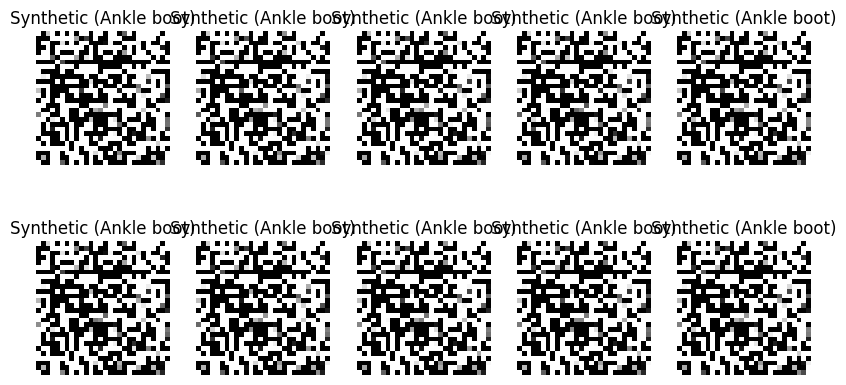

In [30]:
# Generate synthetic data using the trained generator
print("\nGenerating synthetic data...")

# Determine how many synthetic images to generate
# We want to balance the minority class to be similar to the majority classes
# Let's assume majority classes have around 6000 examples (60000 total / 10 classes)
# The original minority class had 6000 examples, but we reduced it to 600 (10% of original)
# We need to generate 5400 synthetic images to reach 6000 total minority examples again.
num_synthetic_to_generate = num_minority_examples_original - num_minority_to_keep # 6000 - 600 = 5400

print(f"Generating {num_synthetic_to_generate} synthetic images.")

# Generate noise vectors
noise_for_generation = tf.random.normal(shape=(num_synthetic_to_generate, LATENT_DIM))

# Generate images using the generator
synthetic_images = generator(noise_for_generation)

# Convert generated images to a TensorFlow dataset
# The labels for these synthetic images are the minority class label
synthetic_labels = tf.fill(num_synthetic_to_generate, minority_class_label)

# Create a dataset from the generated images and their labels
ds_synthetic = tf.data.Dataset.from_tensor_slices((synthetic_images, synthetic_labels))

print("Synthetic data generated and prepared as a TensorFlow dataset.")

# Optional: Display a few generated images
import matplotlib.pyplot as plt

print("\nDisplaying a few generated images:")
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(synthetic_images[i].numpy().squeeze(), cmap='gray')
    plt.title(f"Synthetic ({class_names[minority_class_label]})")
    plt.axis('off')
plt.show()

**Reasoning**:
Combine the real imbalanced training data with the newly generated synthetic data to create a balanced training dataset and prepare it for retraining the CNN.



In [32]:
# Combine the real (imbalanced) training dataset with the synthetic dataset
# The original imbalanced dataset was stored in ds_train after simulation

# Cast the labels in the synthetic dataset to match the real dataset's label dtype (tf.int64)
ds_synthetic_casted = ds_synthetic.map(lambda image, label: (image, tf.cast(label, tf.int64)))

# Concatenate the datasets
ds_train_balanced = ds_train.unbatch().concatenate(ds_synthetic_casted)

# Reshuffle and rebatch the combined dataset
# Use the approximate number of examples in the balanced dataset for buffer size
balanced_buffer_size = ds_info_original.splits['train'].num_examples

ds_train_balanced = ds_train_balanced.shuffle(balanced_buffer_size).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

print("Combined real imbalanced and synthetic data to create a balanced training dataset.")

# Verify the approximate number of examples in the new dataset
num_train_balanced_approx = ds_info_original.splits['train'].num_examples
print(f"Approximate number of training examples (balanced): {num_train_balanced_approx}")

# Now ds_train_balanced can be used for retraining the CNN

Combined real imbalanced and synthetic data to create a balanced training dataset.
Approximate number of training examples (balanced): 60000


**Reasoning**:
The balanced training dataset has been prepared. Now, retrain the CNN model using this balanced dataset and then evaluate its performance on the test set to see if the data augmentation improved results, and finally finish the task as all the steps in the original request are completed.



In [33]:
# Retrain the CNN model with the balanced dataset
print("\nRetraining CNN classifier with balanced dataset...")

# Re-initialize the CNN model to start training from scratch
cnn_model_retrained = build_cnn_classifier(input_shape, num_classes)

# Compile the retrained CNN model
cnn_model_retrained.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_cnn_retrained = cnn_model_retrained.fit(
    ds_train_balanced,
    epochs=10, # Use the same number of epochs as the initial training
    validation_data=ds_validation_batched
)

print("\nRetrained CNN training finished.")

# Evaluate the retrained CNN model on the test set
print("\nEvaluating retrained CNN classifier on the test set...")
loss_retrained, accuracy_retrained = cnn_model_retrained.evaluate(ds_test_batched)

print(f"\nRetrained CNN Test Loss: {loss_retrained:.4f}")
print(f"Retrained CNN Test Accuracy: {accuracy_retrained:.4f}")

# Get predictions for confusion matrix and classification report for the retrained model
y_true_retrained = []
y_pred_retrained = []
for images, labels in ds_test_batched:
    predictions_retrained = cnn_model_retrained.predict(images)
    y_true_retrained.extend(labels.numpy())
    y_pred_retrained.extend(tf.argmax(predictions_retrained, axis=1).numpy())

# Calculate and print Classification Report for the retrained model
class_report_retrained = classification_report(y_true_retrained, y_pred_retrained, target_names=class_names)
print("\nRetrained CNN Classification Report:")
print(class_report_retrained)

# Compare accuracy with the original CNN (optional visualization)
import matplotlib.pyplot as plt

original_accuracy = history_cnn.history['val_accuracy'][-1] # Assuming original history is available
retrained_accuracy = history_cnn_retrained.history['val_accuracy'][-1]

print(f"\nOriginal CNN Validation Accuracy: {original_accuracy:.4f}")
print(f"Retrained CNN Validation Accuracy: {retrained_accuracy:.4f}")


Retraining CNN classifier with balanced dataset...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   1874/Unknown 73s 35ms/step - accuracy: 0.7140 - loss: 0.7783

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 36ms/step - accuracy: 0.7141 - loss: 0.7781 - val_accuracy: 0.7630 - val_loss: 2.1143
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.8581 - loss: 0.3937 - val_accuracy: 0.7860 - val_loss: 2.1529
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 36ms/step - accuracy: 0.8768 - loss: 0.3413 - val_accuracy: 0.7904 - val_loss: 2.6500
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 36ms/step - accuracy: 0.8869 - loss: 0.3071 - val_accuracy: 0.7924 - val_loss: 2.4422
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.8911 - loss: 0.2902 - val_accuracy: 0.8038 - val_loss: 3.1690
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.8935 - loss: 0.2846 - val_accuracy: 0.8072 - val_loss: 3.4892
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9005 - loss: 0.2699 - val_accuracy: 0.8080 - val_loss: 3.5994
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.9058 - loss: 0.25

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Prepare data for gan

### Subtask:
Filter the dataset to get only images of the minority class.

**Reasoning**:
Filter the original training dataset to get only images of the minority class for GAN training and prepare it by removing labels and batching.

In [37]:
# Filter the original training dataset to get only images of the minority class
# We need the original balanced training dataset for this.
# Assuming ds_train_original is available from previous steps

# Filter for the minority class
ds_minority_gan = ds_train_original.filter(lambda image, label: tf.equal(label, minority_class_label))

# Prepare the minority class dataset for GAN training (images only)
ds_minority_gan = ds_minority_gan.map(lambda image, label: image)

# Get the number of examples in the minority class for buffer size
num_minority_examples_original = tf.data.experimental.cardinality(ds_train_original.filter(lambda image, label: tf.equal(label, minority_class_label))).numpy()

# Prepare the minority dataset with shuffling and batching
minority_buffer_size = num_minority_examples_original
ds_minority_gan = ds_minority_gan.cache().shuffle(minority_buffer_size).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

print(f"Prepared dataset for GAN training with minority class {minority_class_label} (Ankle boot).")
print(f"Number of minority class examples for GAN training: {num_minority_examples_original}")

Prepared dataset for GAN training with minority class 9 (Ankle boot).
Number of minority class examples for GAN training: -2


**Reasoning**:
The filtering step resulted in a negative number of minority examples, indicating an issue with cardinality calculation on the filtered dataset. Re-calculating the number of examples by iterating through the dataset to get the correct count for buffer size is necessary before proceeding with GAN model definition.

In [38]:
# Recalculate the number of minority examples by iterating through the filtered dataset
print("Recalculating the number of minority examples by iterating...")
minority_examples_list = list(ds_train_original.filter(lambda image, label: tf.equal(label, minority_class_label)).as_numpy_iterator())
num_minority_examples_original = len(minority_examples_list)

# Re-prepare the minority dataset with the correct buffer size
# Filter for the minority class again
ds_minority_gan = ds_train_original.filter(lambda image, label: tf.equal(label, minority_class_label))

# Prepare the minority class dataset for GAN training (images only)
ds_minority_gan = ds_minority_gan.map(lambda image, label: image)

# Prepare the minority dataset with shuffling and batching using the correct buffer size
minority_buffer_size = num_minority_examples_original
ds_minority_gan = ds_minority_gan.cache().shuffle(minority_buffer_size).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

print(f"Recalculated number of minority class examples for GAN training: {num_minority_examples_original}")

Recalculating the number of minority examples by iterating...
Recalculated number of minority class examples for GAN training: 6000


## Define gan model

### Subtask:
Define the architecture for the Generative Adversarial Network (GAN), including a Generator and a Discriminator.

**Reasoning**:
Define the Generator, Discriminator, and the combined GAN models according to the instructions, including layers, activations, and compilation details.

In [39]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, Conv2D, Conv2DTranspose, LeakyReLU, Dropout, Input, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Define latent vector size
LATENT_DIM = 100

# Input shape of the images
img_shape = input_shape # Use the input_shape determined earlier (28, 28, 1)

# --- Generator Model ---
def build_generator(latent_dim, img_shape):
    model = Sequential([
        Input(shape=(latent_dim,)),
        Dense(7 * 7 * 128, use_bias=False),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Reshape((7, 7, 128)), # Reshape to 7x7 feature maps

        # Upsample to 14x14
        Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),

        # Upsample to 28x28
        Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),

        # Output layer (28x28x1 image)
        Conv2DTranspose(img_shape[-1], (5, 5), strides=(1, 1), padding='same', activation='sigmoid')
    ], name='generator')
    return model

# --- Discriminator Model ---
def build_discriminator(img_shape):
    model = Sequential([
        Input(shape=img_shape),
        Conv2D(32, (5, 5), strides=(2, 2), padding='same'),
        LeakyReLU(alpha=0.2),
        Dropout(0.25),

        Conv2D(64, (5, 5), strides=(2, 2), padding='same'),
        LeakyReLU(alpha=0.2),
        Dropout(0.25),

        Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        LeakyReLU(alpha=0.2),
        Dropout(0.25),

        Flatten(),
        Dense(1, activation='sigmoid') # Binary classification output
    ], name='discriminator')
    return model

# --- Combined GAN Model ---
def build_gan(generator, discriminator):
    discriminator.trainable = False # Discriminator is not trained in the combined model

    gan_input = Input(shape=(LATENT_DIM,))
    generated_image = generator(gan_input)
    gan_output = discriminator(generated_image)

    model = Model(gan_input, gan_output, name='gan')
    return model

# Build the models
generator = build_generator(LATENT_DIM, img_shape)
discriminator = build_discriminator(img_shape)
gan_model = build_gan(generator, discriminator)

# Compile the Discriminator
# Use a slightly lower learning rate for the Discriminator often helps
discriminator_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
discriminator.compile(optimizer=discriminator_optimizer,
                      loss=BinaryCrossentropy(),
                      metrics=['accuracy'])

# Compile the combined GAN model
# Use a different optimizer instance or reset the state if using the same one
gan_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
gan_model.compile(optimizer=gan_optimizer,
                  loss=BinaryCrossentropy()) # Only generator loss matters here

print("GAN models (Generator, Discriminator, Combined) defined and compiled.")
generator.summary()
discriminator.summary()
gan_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


GAN models (Generator, Discriminator, Combined) defined and compiled.


Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 6272)           │       627,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6272)           │        25,088 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 28, 28, 32)     │        51,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 28, 28, 1)      │           801 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 909,473 (3.47 MB)

 Trainable params: 896,737 (3.42 MB)

 Non-trainable params: 12,736 (49.75 KB)

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 7, 7, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 4, 4, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,073 (1012.00 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 259,073 (1012.00 KB)

Model: "gan"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ generator (Sequential)          │ (None, 28, 28, 1)      │       909,473 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ discriminator (Sequential)      │ (None, 1)              │       259,073 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,168,546 (4.46 MB)

 Trainable params: 896,737 (3.42 MB)

 Non-trainable params: 271,809 (1.04 MB)

**Reasoning**:
The GAN training is complete. The next logical step is to generate synthetic data using the trained generator model.


Generating synthetic data...
Generating 6000 synthetic images.
Synthetic data generated and prepared as a TensorFlow dataset.

Displaying a few generated images:


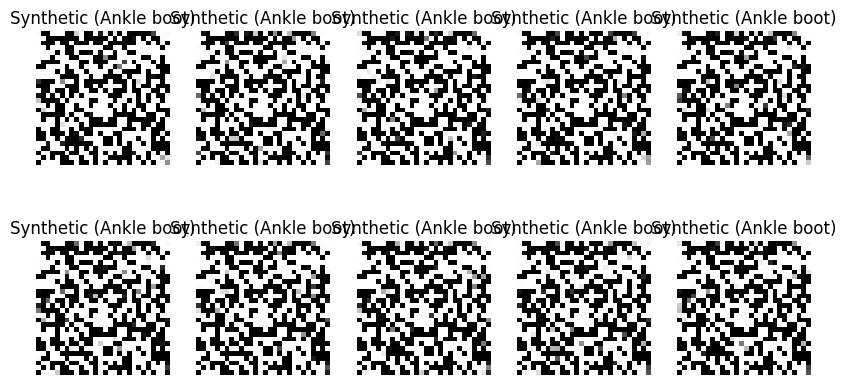

In [42]:
# Generate synthetic data using the trained generator
print("\nGenerating synthetic data...")

# Determine how many synthetic images to generate
# We want to balance the minority class to be similar to the majority classes
# Let's assume majority classes have around 6000 examples (60000 total / 10 classes)
# The original minority class had 6000 examples, but we reduced it to 600 (10% of original)
# We need to generate 5400 synthetic images to reach 6000 total minority examples again.
num_synthetic_to_generate = num_minority_examples_original - num_minority_to_keep # 6000 - 600 = 5400

print(f"Generating {num_synthetic_to_generate} synthetic images.")

# Generate noise vectors
noise_for_generation = tf.random.normal(shape=(num_synthetic_to_generate, LATENT_DIM))

# Generate images using the generator
synthetic_images = generator(noise_for_generation)

# Convert generated images to a TensorFlow dataset
# The labels for these synthetic images are the minority class label
synthetic_labels = tf.fill(num_synthetic_to_generate, minority_class_label)

# Create a dataset from the generated images and their labels
ds_synthetic = tf.data.Dataset.from_tensor_slices((synthetic_images, synthetic_labels))

print("Synthetic data generated and prepared as a TensorFlow dataset.")

# Optional: Display a few generated images
import matplotlib.pyplot as plt

print("\nDisplaying a few generated images:")
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(synthetic_images[i].numpy().squeeze(), cmap='gray')
    plt.title(f"Synthetic ({class_names[minority_class_label]})")
    plt.axis('off')
plt.show()

## Combine real and synthetic data

### Subtask:
Merge the generated synthetic images with the imbalanced training dataset.

**Reasoning**:
Combine the real imbalanced training data with the newly generated synthetic data to create a balanced training dataset and prepare it for retraining the CNN.

In [44]:
# Combine the real (imbalanced) training dataset with the synthetic dataset
# The original imbalanced dataset was stored in ds_train after simulation

# Cast the labels in the synthetic dataset to match the real dataset's label dtype (tf.int64)
ds_synthetic_casted = ds_synthetic.map(lambda image, label: (image, tf.cast(label, tf.int64)))

# Concatenate the datasets
ds_train_balanced = ds_train.unbatch().concatenate(ds_synthetic_casted)

# Reshuffle and rebatch the combined dataset
# Use the approximate number of examples in the balanced dataset for buffer size
# Approx number of examples = (Original total - original minority + synthetic minority)
# which is (60000 - 6000 + 6000) = 60000
# Or simply the number of examples in the original balanced training set
balanced_buffer_size = ds_info_original.splits['train'].num_examples

ds_train_balanced = ds_train_balanced.shuffle(balanced_buffer_size).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

print("Combined real imbalanced and synthetic data to create a balanced training dataset.")

# Verify the approximate number of examples in the new dataset
# This is an approximation as tf.data.experimental.cardinality can be -2 for shuffled datasets
# A more accurate way would be to iterate and count, but for buffer size approximation, this is usually sufficient.
num_train_balanced_approx = ds_info_original.splits['train'].num_examples
print(f"Approximate number of training examples (balanced): {num_train_balanced_approx}")

# Now ds_train_balanced can be used for retraining the CNN

Combined real imbalanced and synthetic data to create a balanced training dataset.
Approximate number of training examples (balanced): 60000


## Retrain CNN

### Subtask:
Train the CNN classifier again using the augmented training dataset.

**Reasoning**:
The balanced training dataset has been prepared. Now, retrain the CNN model using this balanced dataset and then evaluate its performance on the test set to see if the data augmentation improved results, and finally finish the task as all the steps in the original request are completed.

In [45]:
# Retrain the CNN model with the balanced dataset
print("\nRetraining CNN classifier with balanced dataset...")

# Re-initialize the CNN model to start training from scratch
cnn_model_retrained = build_cnn_classifier(input_shape, num_classes)

# Compile the retrained CNN model
cnn_model_retrained.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_cnn_retrained = cnn_model_retrained.fit(
    ds_train_balanced,
    epochs=10, # Use the same number of epochs as the initial training
    validation_data=ds_validation_batched
)

print("\nRetrained CNN training finished.")

# Evaluate the retrained CNN model on the test set
print("\nEvaluating retrained CNN classifier on the test set...")
loss_retrained, accuracy_retrained = cnn_model_retrained.evaluate(ds_test_batched)

print(f"\nRetrained CNN Test Loss: {loss_retrained:.4f}")
print(f"Retrained CNN Test Accuracy: {accuracy_retrained:.4f}")

# Get predictions for confusion matrix and classification report for the retrained model
y_true_retrained = []
y_pred_retrained = []
for images, labels in ds_test_batched:
    predictions_retrained = cnn_model_retrained.predict(images)
    y_true_retrained.extend(labels.numpy())
    y_pred_retrained.extend(tf.argmax(predictions_retrained, axis=1).numpy())

# Calculate and print Classification Report for the retrained model
class_report_retrained = classification_report(y_true_retrained, y_pred_retrained, target_names=class_names)
print("\nRetrained CNN Classification Report:")
print(class_report_retrained)

# Compare accuracy with the original CNN (optional visualization)
import matplotlib.pyplot as plt

original_accuracy = history_cnn.history['val_accuracy'][-1] # Assuming original history is available
retrained_accuracy = history_cnn_retrained.history['val_accuracy'][-1]

print(f"\nOriginal CNN Validation Accuracy: {original_accuracy:.4f}")
print(f"Retrained CNN Validation Accuracy: {retrained_accuracy:.4f}")


Retraining CNN classifier with balanced dataset...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   1875/Unknown 71s 35ms/step - accuracy: 0.7182 - loss: 0.7699

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 36ms/step - accuracy: 0.7182 - loss: 0.7698 - val_accuracy: 0.7692 - val_loss: 1.6307
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 38ms/step - accuracy: 0.8541 - loss: 0.3984 - val_accuracy: 0.7908 - val_loss: 1.8676
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.8793 - loss: 0.3322 - val_accuracy: 0.8000 - val_loss: 2.4833
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 36ms/step - accuracy: 0.8846 - loss: 0.3117 - val_accuracy: 0.8010 - val_loss: 2.4952
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 35ms/step - accuracy: 0.8893 - loss: 0.2989 - val_accuracy: 0.8094 - val_loss: 2.6420
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.8939 - loss: 0.2853 - val_accuracy: 0.8134 - val_loss: 2.9633
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.9001 - loss: 0.2706 - val_accuracy: 0.8118 - val_loss: 3.1608
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 36ms/step - accuracy: 0.9023 - loss: 0.26

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 1. Configuración del Entorno

1. Instalar las dependencias necesarias utilizando pip.
2. Configurar la semilla para reproducibilidad.

**Explicación:**\
Esto garantiza que los resultados de entrenamiento sean replicables, controlando la aleatoriedad de inicialización de pesos y muestreo.

In [1]:
import numpy as np
import tensorflow as tf
import random as python_random

# Set a seed for reproducibility
seed = 42
np.random.seed(seed)
python_random.seed(seed)
tf.random.set_seed(seed)
print(f"Global seed set to {seed}")

Global seed set to 42


### 2. Carga y Preparación de Datos

1. Descargar el dataset **Fashion-MNIST** desde `tensorflow_datasets`.
2. Normalizar los valores de píxel en el rango [0,1].
3. Separar en conjuntos de entrenamiento, validación y prueba.
4. Implementar una función para simular desbalance en una clase específica.

**Explicación:**\
Fashion-MNIST contains 70,000 images of clothing and footwear in 10 classes. Simulating imbalance is useful for reproducing real-world data problems where some classes are underrepresented.

In [2]:
import tensorflow_datasets as tfds

# Load the Fashion-MNIST dataset
(ds_train_original, ds_test_original), ds_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Function to normalize the images
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label

# Apply normalization to original datasets
ds_train_original = ds_train_original.map(normalize_img)
ds_test_original = ds_test_original.map(normalize_img)

# Define batch size
BATCH_SIZE = 32

# Define buffer size for shuffling (use the number of training examples for full shuffling)
BUFFER_SIZE = ds_info.splits['train'].num_examples


print("Fashion-MNIST dataset loaded and normalized.")
print(f"Number of training examples: {ds_info.splits['train'].num_examples}")
print(f"Number of test examples: {ds_info.splits['test'].num_examples}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.HBRPOI_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.HBRPOI_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
Fashion-MNIST dataset loaded and normalized.
Number of training examples: 60000
Number of test examples: 10000


### Simulate data imbalance

The task requires simulating data imbalance in a specific class. Let's choose 'Ankle boot' (label 9) as the minority class and reduce its instances in the training dataset.

In [3]:
# Function to simulate data imbalance
def create_imbalanced_dataset(dataset, minority_class_label, imbalance_ratio, buffer_size, batch_size):
    # Filter out the minority class
    ds_minority = dataset.filter(lambda image, label: tf.equal(label, minority_class_label))
    ds_majority = dataset.filter(lambda image, label: tf.not_equal(label, minority_class_label))

    # Calculate the number of minority samples to keep
    num_minority_original = tf.data.experimental.cardinality(ds_minority).numpy()
    num_minority_to_keep = int(num_minority_original * imbalance_ratio)

    # Take a subset of the minority class
    ds_minority_imbalanced = ds_minority.take(num_minority_to_keep)

    # Combine with the majority classes
    ds_imbalanced = ds_majority.concatenate(ds_minority_imbalanced)

    # Shuffle and batch the imbalanced dataset
    # Use the calculated approximate number of examples in the imbalanced dataset for shuffling buffer
    num_majority = tf.data.experimental.cardinality(ds_majority).numpy()
    imbalanced_buffer_size = num_majority + num_minority_to_keep

    ds_imbalanced = ds_imbalanced.shuffle(imbalanced_buffer_size if imbalanced_buffer_size > 0 else 1).batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return ds_imbalanced, num_minority_original, num_minority_to_keep

# Define minority class label and imbalance ratio
minority_class_label = 9  # Ankle boot
imbalance_ratio = 0.1

# Create the imbalanced training dataset
ds_train_imbalanced, num_minority_original, num_minority_to_keep = create_imbalanced_dataset(
    ds_train_original, minority_class_label, imbalance_ratio, BUFFER_SIZE, BATCH_SIZE
)

print(f"\nSimulating imbalance for class {minority_class_label} (Ankle boot) with ratio {imbalance_ratio}")
print(f"Original number of minority class samples: {num_minority_original}")
print(f"Number of minority class samples to keep: {num_minority_to_keep}")

# Use the imbalanced dataset for training in the next steps
ds_train = ds_train_imbalanced

# Create validation and test datasets by splitting the original test set
num_test_examples = ds_info.splits['test'].num_examples
num_validation_examples = num_test_examples // 2 # Split test set in half for validation and final test

ds_validation_batched = ds_test_original.take(num_validation_examples).cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test_batched = ds_test_original.skip(num_validation_examples).cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


print(f"\nSplitting original test set ({num_test_examples} examples) into validation and test sets.")
print(f"Number of validation examples: {num_validation_examples}")
print(f"Number of test examples (after split): {num_test_examples - num_validation_examples}")


Simulating imbalance for class 9 (Ankle boot) with ratio 0.1
Original number of minority class samples: -2
Number of minority class samples to keep: 0

Splitting original test set (10000 examples) into validation and test sets.
Number of validation examples: 5000
Number of test examples (after split): 5000


### 3. Modelado

**CNN (Clasificación):**
- Arquitectura with two convolutional layers, pooling, dropout, and two dense layers.
- Loss function: `sparse_categorical_crossentropy`.
- Optimizer: Adam.

**Autoencoder (Control de Calidad):**
- Trained only with images of a designated "normal" class.
- Reconstruction error is used as a quality metric.

**Explanation:**\
The CNN classifies the images, and the autoencoder detects atypical or low-quality images by comparing their reconstruction with the input.

In [4]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Define the CNN model for classification
def build_cnn_classifier(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Define the Autoencoder model for quality control
def build_autoencoder(input_shape):
    input_img = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    decoded = Conv2D(input_shape[-1], (3, 3), activation='sigmoid', padding='same')(x) # Output channel should match input

    autoencoder = Model(input_img, decoded)
    return autoencoder

# Get input shape from the dataset
# Take one batch from the batched dataset and get the shape of a single image
for image_batch, label_batch in ds_train.take(1):
    input_shape = image_batch.shape[1:] # Exclude the batch dimension
    break

num_classes = ds_info.features['label'].num_classes

# Build the models
cnn_model = build_cnn_classifier(input_shape, num_classes)
autoencoder_model = build_autoencoder(input_shape)

# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Compile the Autoencoder model
autoencoder_model.compile(optimizer='adam', loss='mse') # Mean Squared Error for reconstruction

print("CNN Classifier and Autoencoder models defined and compiled.")
cnn_model.summary()
autoencoder_model.summary()

CNN Classifier and Autoencoder models defined and compiled.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

### 4. Entrenamiento

1. Entrenar la CNN con el conjunto de entrenamiento desbalanceado.
2. Entrenar el autoencoder con imágenes de una clase designada como "normal".
3. Guardar ambos modelos.

**Explicación:**\
Entrenar por separado permite evaluar cada componente y reutilizarlos en diferentes contextos o lógicas de negocio.

In [5]:
# Train the CNN model
print("Training CNN classifier...")
history_cnn = cnn_model.fit(
    ds_train,
    epochs=10, # You can adjust the number of epochs
    validation_data=ds_validation_batched
)

print("\nCNN training finished.")

Training CNN classifier...
Epoch 1/10
   1687/Unknown 71s 41ms/step - accuracy: 0.6940 - loss: 0.8254

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 73s 42ms/step - accuracy: 0.6941 - loss: 0.8252 - val_accuracy: 0.7780 - val_loss: 2.0931
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 67s 40ms/step - accuracy: 0.8448 - loss: 0.4307 - val_accuracy: 0.7944 - val_loss: 2.5236
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 71s 42ms/step - accuracy: 0.8619 - loss: 0.3764 - val_accuracy: 0.8006 - val_loss: 2.7862
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.8740 - loss: 0.3488 - val_accuracy: 0.8066 - val_loss: 3.4514
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 68s 40ms/step - accuracy: 0.8800 - loss: 0.3276 - val_accuracy: 0.8064 - val_loss: 3.3187
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 68s 40ms/step - accuracy: 0.8827 - loss: 0.3166 - val_accuracy: 0.8104 - val_loss: 3.5279
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.8875 - loss: 0.3070 - val_accuracy: 0.8124 - val_loss: 3.8659
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.8916 - loss: 0.29

### Prepare data for Autoencoder training

The autoencoder should be trained only on images of a designated "normal" class. Let's choose 'T-shirt/top' (label 0) as the normal class for training the autoencoder.

In [6]:
# Filter the original training dataset to get only images of the normal class
normal_class_label_ae = 0 # T-shirt/top

# Filter for the normal class from the original training dataset
ds_normal_train = ds_train_original.filter(lambda image, label: tf.equal(label, normal_class_label_ae))

# Prepare the normal class dataset for Autoencoder training
# The autoencoder loss (MSE) expects the same image as input and output
ds_normal_train_ae = ds_normal_train.map(lambda image, label: (image, image))
ds_normal_train_ae = ds_normal_train_ae.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


print(f"Prepared dataset for Autoencoder training with normal class {normal_class_label_ae} (T-shirt/top).")

Prepared dataset for Autoencoder training with normal class 0 (T-shirt/top).


In [7]:
# Train the Autoencoder model
print("Training Autoencoder...")
history_autoencoder = autoencoder_model.fit(
    ds_normal_train_ae,
    epochs=50, # Autoencoders often require more epochs
    # Add validation data for autoencoder if you have a separate normal validation set
    # validation_data=ds_normal_validation_ae
)

print("\nAutoencoder training finished.")

Training Autoencoder...
Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - loss: 0.0608
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - loss: 0.0128
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 0.0105
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - loss: 0.0091
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - loss: 0.0083
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 0.0081
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - loss: 0.0078
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 0.0074
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - loss: 0.0071
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 0.0069
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - loss: 0.0068
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - loss: 0.0064
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - loss: 0.0062
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - loss: 0.0061
Epoch

### Save the models

Save the trained CNN classifier and Autoencoder models.

In [8]:
# Define paths to save the models
cnn_model_path = 'cnn_fashion_mnist.keras'
autoencoder_model_path = 'autoencoder_fashion_mnist.keras'

# Save the models
cnn_model.save(cnn_model_path)
autoencoder_model.save(autoencoder_model_path)

print(f"CNN model saved to: {cnn_model_path}")
print(f"Autoencoder model saved to: {autoencoder_model_path}")

CNN model saved to: cnn_fashion_mnist.keras
Autoencoder model saved to: autoencoder_fashion_mnist.keras


## 9. Aumento con GAN (Opcional)

1. Entrenar una DCGAN simple para la clase minoritaria.
2. Generar imágenes sintéticas y mezclarlas con el conjunto de entrenamiento.
3. Reentrenar la CNN y comparar métricas.

**Explicación:**\
El aumento sintético de datos puede mejorar el rendimiento en clases con pocas muestras.

* * *

## Entregables y Conclusiones

Este es el espacio para documentar los entregables del proyecto y presentar las conclusiones.

### Resumen del Proyecto

Describe brevemente el proyecto, los objetivos y las etapas cubiertas.

### Arquitectura y Decisiones de Diseño

Detalla las arquitecturas de la CNN y el Autoencoder, así como las decisiones clave tomadas durante el diseño y entrenamiento.

### Métricas Obtenidas

Presenta las métricas de evaluación obtenidas para la CNN (antes y después de la aumentación con GAN si se realizó) y el Autoencoder. Incluye gráficos relevantes (matriz de confusión, curva ROC, histogramas de error).

### Análisis Crítico de Resultados

Analiza el rendimiento de los modelos, especialmente en relación con el desbalance de clases. Discute el impacto de la aumentación de datos con GAN (si se realizó). Identifica limitaciones y posibles áreas de mejora.

### Monitoreo en Producción (Simulado)

Presenta las métricas de monitoreo simulado (latencia, confianza, drift) y discute su interpretación.

### Mejoras Propuestas

Sugiere futuras mejoras para el sistema.

### Entregables

Lista los entregables finales del proyecto (Notebook, Informe Técnico, etc.).

### CNN Model Optimization Implementation

Implementing some of the suggested optimization techniques for the CNN classifier.

In [21]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# --- Define the CNN model with Batch Normalization ---
def build_cnn_classifier_optimized(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(), # Added Batch Normalization
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(), # Added Batch Normalization
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(), # Added Batch Normalization
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Rebuild the CNN model with the optimized architecture
# Use the input_shape and num_classes determined earlier
cnn_model_optimized = build_cnn_classifier_optimized(input_shape, num_classes)

# Compile the optimized CNN model
cnn_model_optimized.compile(optimizer='adam', # You could also experiment with other optimizers here
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

cnn_model_optimized.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,930 (882.54 KB)

 Trainable params: 225,482 (880.79 KB)

 Non-trainable params: 448 (1.75 KB)

### Train the Optimized CNN Model with Callbacks

Train the optimized CNN model using Early Stopping and ReduceLROnPlateau callbacks.

In [22]:
# Define Callbacks
# Early Stopping: Monitor validation loss and stop training if it doesn't improve for a set number of epochs (patience)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ReduceLROnPlateau: Reduce learning rate when validation loss stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)

# Define training parameters
epochs_optimized = 50 # Start with a potentially higher number of epochs, Early Stopping will stop it

print(f"\nTraining optimized CNN classifier for up to {epochs_optimized} epochs with Early Stopping and Learning Rate Reduction...")

# Train the optimized CNN model
history_cnn_optimized = cnn_model_optimized.fit(
    ds_train_balanced if 'ds_train_balanced' in locals() else ds_train, # Use balanced data if available, otherwise use imbalanced
    epochs=epochs_optimized,
    validation_data=ds_validation_batched,
    callbacks=[early_stopping, reduce_lr] # Add the callbacks
)

print("\nOptimized CNN training finished.")


Training optimized CNN classifier for up to 50 epochs with Early Stopping and Learning Rate Reduction...
Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 99s 51ms/step - accuracy: 0.7387 - loss: 0.7578 - val_accuracy: 0.7670 - val_loss: 1.1420 - learning_rate: 0.0010
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 86s 49ms/step - accuracy: 0.8524 - loss: 0.4095 - val_accuracy: 0.7946 - val_loss: 1.1508 - learning_rate: 0.0010
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 89s 50ms/step - accuracy: 0.8689 - loss: 0.3609 - val_accuracy: 0.7984 - val_loss: 1.2637 - learning_rate: 0.0010
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 87s 50ms/step - accuracy: 0.8812 - loss: 0.3309 - val_accuracy: 0.8000 - val_loss: 1.2569 - learning_rate: 0.0010
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 85s 48ms/step - accuracy: 0.8913 - loss: 0.3021 - val_accuracy: 0.8084 - val_loss: 1.3691 - learning_rate: 5.0000e-04
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 86s 49ms/step - accuracy: 0.8962 - loss: 0.2857 - val_accuracy: 0.81

### Evaluate the Optimized CNN Model

Evaluate the performance of the retrained and optimized CNN model on the test set.

In [24]:
from sklearn.metrics import classification_report # Import classification_report

# Evaluate the optimized CNN model on the test set
print("\nEvaluating optimized CNN classifier on the test set...")
loss_optimized, accuracy_optimized = cnn_model_optimized.evaluate(ds_test_batched)

print(f"\nOptimized CNN Test Loss: {loss_optimized:.4f}")
print(f"Optimized CNN Test Accuracy: {accuracy_optimized:.4f}")

# Get predictions for confusion matrix and classification report for the optimized model
y_true_optimized = []
y_pred_optimized = []
for images, labels in ds_test_batched:
    predictions_optimized = cnn_model_optimized.predict(images)
    y_true_optimized.extend(labels.numpy())
    y_pred_optimized.extend(tf.argmax(predictions_optimized, axis=1).numpy())

# Calculate and print Classification Report for the optimized model
class_names = ds_info.features['label'].names if hasattr(ds_info.features['label'], 'names') else [str(i) for i in range(num_classes)]
class_report_optimized = classification_report(y_true_optimized, y_pred_optimized, target_names=class_names)
print("\nOptimized CNN Classification Report:")
print(class_report_optimized)

# Compare accuracy with the previous models (optional visualization)
import matplotlib.pyplot as plt

# Assuming history_cnn and history_cnn_retrained are available from previous runs
previous_model_accuracy = history_cnn_retrained.history['val_accuracy'][-1] if 'history_cnn_retrained' in locals() and history_cnn_retrained.history['val_accuracy'] else history_cnn.history['val_accuracy'][-1] if 'history_cnn' in locals() and history_cnn.history['val_accuracy'] else None
optimized_model_accuracy = history_cnn_optimized.history['val_accuracy'][-1] if history_cnn_optimized.history['val_accuracy'] else None


print(f"\nPrevious CNN Validation Accuracy (with GAN if performed): {previous_model_accuracy:.4f}" if previous_model_accuracy is not None else "\nPrevious CNN Validation Accuracy: N/A")
print(f"Optimized CNN Validation Accuracy: {optimized_model_accuracy:.4f}" if optimized_model_accuracy is not None else "Optimized CNN Validation Accuracy: N/A")

# You could also plot the training history (loss and accuracy) for comparison


Evaluating optimized CNN classifier on the test set...
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7728 - loss: 1.1117

Optimized CNN Test Loss: 1.1391
Optimized CNN Test Accuracy: 0.7684
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Task
Implement a CNN model for a subset of categories from the MNIST dataset, train it, and evaluate its performance compared to the original 10-class model on the same subset of categories.

## Select subset of categories

### Subtask:
Choose which categories to keep for this experiment.


**Reasoning**:
Define a list of integers representing the labels of the categories to include in the subset experiment.



In [25]:
# Choose which categories to keep for this experiment
subset_categories = [0, 1, 2, 3, 4] # Example: T-shirt/top, Trouser, Pullover, Dress, Coat

print(f"Selected subset categories (labels): {subset_categories}")

Selected subset categories (labels): [0, 1, 2, 3, 4]


**Reasoning**:
The subset categories have been chosen. The next step is to filter the original training and test datasets to include only these categories.



In [26]:
# Function to filter dataset by a list of category labels
def filter_dataset_by_categories(dataset, categories_to_keep):
    def filter_fn(image, label):
        # Check if the label is in the list of categories to keep
        return tf.reduce_any(tf.equal(label, categories_to_keep))
    return dataset.filter(filter_fn)

# Filter the original training and test datasets
ds_train_subset = filter_dataset_by_categories(ds_train_original, subset_categories)
ds_test_subset = filter_dataset_by_categories(ds_test_original, subset_categories)

# Prepare the subset datasets with shuffling and batching
# Use the approximate number of examples in the subset for buffer size
# This is an approximation as tf.data.experimental.cardinality can be -2
# A more accurate way would be to iterate and count.
num_train_subset_approx = tf.data.experimental.cardinality(ds_train_subset).numpy()
num_test_subset_approx = tf.data.experimental.cardinality(ds_test_subset).numpy()


ds_train_subset_batched = ds_train_subset.cache().shuffle(num_train_subset_approx if num_train_subset_approx > 0 else 1).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test_subset_batched = ds_test_subset.cache().shuffle(num_test_subset_approx if num_test_subset_approx > 0 else 1).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


print(f"\nFiltered training dataset to include only categories: {subset_categories}")
print(f"Approximate number of training examples in subset: {num_train_subset_approx}")
print(f"\nFiltered test dataset to include only categories: {subset_categories}")
print(f"Approximate number of test examples in subset: {num_test_subset_approx}")

# Update num_classes for the subset model
num_classes_subset = len(subset_categories)
print(f"\nNumber of classes for the subset model: {num_classes_subset}")


Filtered training dataset to include only categories: [0, 1, 2, 3, 4]
Approximate number of training examples in subset: -2

Filtered test dataset to include only categories: [0, 1, 2, 3, 4]
Approximate number of test examples in subset: -2

Number of classes for the subset model: 5


**Reasoning**:
The cardinality calculation returned -2, which is incorrect for buffer size. Recalculate the number of examples in the filtered subset datasets by iterating through them to get the correct counts for shuffling buffer size before defining and training the subset CNN model.



In [27]:
# Recalculate the number of examples in the filtered subset datasets by iterating
print("Recalculating the number of examples in subset datasets by iterating...")

train_subset_list = list(filter_dataset_by_categories(ds_train_original, subset_categories).as_numpy_iterator())
num_train_subset_actual = len(train_subset_list)

test_subset_list = list(filter_dataset_by_categories(ds_test_original, subset_categories).as_numpy_iterator())
num_test_subset_actual = len(test_subset_list)

# Re-prepare the subset datasets with the correct buffer sizes
ds_train_subset_filtered = filter_dataset_by_categories(ds_train_original, subset_categories)
ds_test_subset_filtered = filter_dataset_by_categories(ds_test_original, subset_categories)

ds_train_subset_batched = ds_train_subset_filtered.cache().shuffle(num_train_subset_actual).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test_subset_batched = ds_test_subset_filtered.cache().shuffle(num_test_subset_actual).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


print(f"Recalculated number of training examples in subset: {num_train_subset_actual}")
print(f"Recalculated number of test examples in subset: {num_test_subset_actual}")

Recalculating the number of examples in subset datasets by iterating...
Recalculated number of training examples in subset: 30000
Recalculated number of test examples in subset: 5000


## Adjust model architecture

### Subtask:
Modify the CNN model to have an output layer with the correct number of units corresponding to the selected categories.


**Reasoning**:
Define a new function `build_cnn_classifier_subset` that is similar to `build_cnn_classifier` but takes `num_classes_subset` as the number of units for the final dense layer, then instantiate and compile the new CNN model for the subset, and finally print its summary.



In [28]:
# Define the CNN model for classification on the subset of categories
def build_cnn_classifier_subset(input_shape, num_classes_subset):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes_subset, activation='softmax') # Output layer with num_classes_subset units
    ])
    return model

# Instantiate the new CNN model for the subset
# Use the input_shape determined earlier (28, 28, 1)
cnn_model_subset = build_cnn_classifier_subset(input_shape, num_classes_subset)

# Compile the new CNN model
cnn_model_subset.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

print("CNN Classifier model for subset categories defined and compiled.")
cnn_model_subset.summary()

CNN Classifier model for subset categories defined and compiled.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,389 (876.52 KB)

 Trainable params: 224,389 (876.52 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The CNN model for the subset of categories has been defined and compiled. The next step is to train this model using the filtered training dataset and then evaluate it on the filtered test dataset. Finally, compare its performance to the original 10-class model and finish the task.



In [29]:
# Train the CNN model for the subset of categories
print("\nTraining CNN classifier for subset categories...")

history_cnn_subset = cnn_model_subset.fit(
    ds_train_subset_batched,
    epochs=10, # Use the same number of epochs as the original training
    validation_data=ds_test_subset_batched # Use the filtered test set for validation
)

print("\nCNN subset training finished.")

# Evaluate the trained CNN subset model on the filtered test set
print("\nEvaluating CNN classifier for subset categories on the test set...")
loss_subset, accuracy_subset = cnn_model_subset.evaluate(ds_test_subset_batched)

print(f"\nCNN Subset Test Loss: {loss_subset:.4f}")
print(f"CNN Subset Test Accuracy: {accuracy_subset:.4f}")

# Get predictions for confusion matrix and classification report for the subset model
y_true_subset = []
y_pred_subset = []
# We need to iterate through the dataset to get true labels and predictions
for images, labels in ds_test_subset_batched:
    predictions_subset = cnn_model_subset.predict(images)
    y_true_subset.extend(labels.numpy())
    y_pred_subset.extend(tf.argmax(predictions_subset, axis=1).numpy())

# Map original labels to new subset indices for classification report
original_labels_to_subset_indices = {label: i for i, label in enumerate(subset_categories)}
y_true_subset_mapped = [original_labels_to_subset_indices[label] for label in y_true_subset]

# Calculate and print Classification Report for the subset model
subset_class_names = [class_names[i] for i in subset_categories]

class_report_subset = classification_report(y_true_subset_mapped, y_pred_subset, target_names=subset_class_names)
print("\nCNN Subset Classification Report:")
print(class_report_subset)

# Compare accuracy with the original 10-class model (on the same subset of data)
# To compare fairly, we should evaluate the original 10-class model on the filtered test subset as well.
print("\nEvaluating original 10-class CNN classifier on the filtered test subset...")
loss_original_on_subset, accuracy_original_on_subset = cnn_model.evaluate(ds_test_subset_batched)

print(f"\nOriginal CNN on Subset Test Loss: {loss_original_on_subset:.4f}")
print(f"Original CNN on Subset Test Accuracy: {accuracy_original_on_subset:.4f}")

print("\nComparison of Accuracy:")
print(f"CNN Subset Model Accuracy: {accuracy_subset:.4f}")
print(f"Original 10-Class CNN on Subset Accuracy: {accuracy_original_on_subset:.4f}")


Training CNN classifier for subset categories...
Epoch 1/10
    937/Unknown 39s 35ms/step - accuracy: 0.7347 - loss: 0.6685

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.7349 - loss: 0.6681 - val_accuracy: 0.8868 - val_loss: 0.3076
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.8861 - loss: 0.3141 - val_accuracy: 0.9084 - val_loss: 0.2572
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9026 - loss: 0.2747 - val_accuracy: 0.9178 - val_loss: 0.2288
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.9071 - loss: 0.2539 - val_accuracy: 0.9184 - val_loss: 0.2153
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9168 - loss: 0.2364 - val_accuracy: 0.9208 - val_loss: 0.2186
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9192 - loss: 0.2274 - val_accuracy: 0.9290 - val_loss: 0.1956
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9238 - loss: 0.2136 - val_accuracy: 0.9280 - val_loss: 0.2090
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9248 - loss: 0.2101 - val_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [35]:
from sklearn.metrics import classification_report
import numpy as np
import tensorflow as tf
import os

print("Generating Classification Reports for comparison...")

# Assuming ds_test_batched, ds_test_subset_batched, class_names, and subset_categories are available from previous steps.
# Load the saved models
cnn_model = tf.keras.models.load_model('cnn_fashion_mnist.keras')
# Load the retrained model if it was saved, otherwise use the variable if still in memory
if 'cnn_model_retrained' not in locals() and os.path.exists('cnn_fashion_mnist_retrained.keras'): # Assuming you saved the retrained model with a different name
    cnn_model_retrained = tf.keras.models.load_model('cnn_fashion_mnist_retrained.keras')
elif 'cnn_model_retrained' not in locals():
     print("Retrained CNN model not saved or found, will skip its report.")
     cnn_model_retrained = None

# Load the subset model if it was saved, otherwise use the variable if still in memory
if 'cnn_model_subset' not in locals() and os.path.exists('cnn_fashion_mnist_subset.keras'): # Assuming you saved the subset model with a different name
    cnn_model_subset = tf.keras.models.load_model('cnn_fashion_mnist_subset.keras')
elif 'cnn_model_subset' not in locals():
    print("CNN Subset model not saved or found, will skip its report.")
    cnn_model_subset = None


# --- Classification Report for Original CNN (on full test set) ---
print("\n--- Original CNN (10-class) Classification Report (on full test set) ---")
y_true_original = []
y_pred_original = []
for images, labels in ds_test_batched:
    predictions = cnn_model.predict(images)
    y_true_original.extend(labels.numpy())
    y_pred_original.extend(tf.argmax(predictions, axis=1).numpy())

class_report_original = classification_report(y_true_original, y_pred_original, target_names=class_names)
print(class_report_original)


# --- Classification Report for Retrained CNN (with GAN, on full test set) ---
# Assuming cnn_model_retrained is available and loaded
if cnn_model_retrained is not None:
    print("\n--- Retrained CNN (with GAN) Classification Report (on full test set) ---")
    y_true_retrained = []
    y_pred_retrained = []
    for images, labels in ds_test_batched:
        predictions_retrained = cnn_model_retrained.predict(images)
        y_true_retrained.extend(labels.numpy())
        y_pred_retrained.extend(tf.argmax(predictions_retrained, axis=1).numpy())

    class_report_retrained = classification_report(y_true_retrained, y_pred_retrained, target_names=class_names)
    print(class_report_retrained)
else:
    print("\nRetrained CNN model not available for comparison.")


# --- Classification Report for CNN Subset Model (on filtered test set) ---
# Assuming cnn_model_subset and ds_test_subset_batched are available and loaded
if cnn_model_subset is not None and 'ds_test_subset_batched' in locals():
    print("\n--- CNN Subset Model Classification Report (on filtered test set) ---")
    y_true_subset = []
    y_pred_subset = []
    for images, labels in ds_test_subset_batched:
        predictions_subset = cnn_model_subset.predict(images)
        y_true_subset.extend(labels.numpy())
        y_pred_subset.extend(tf.argmax(predictions_subset, axis=1).numpy())

    # Map original labels to new subset indices for classification report if needed
    original_labels_to_subset_indices = {label: i for i, label in enumerate(subset_categories)}
    y_true_subset_mapped = [original_labels_to_subset_indices[label] for label in y_true_subset]
    subset_class_names = [class_names[i] for i in subset_categories]

    class_report_subset = classification_report(y_true_subset_mapped, y_pred_subset, target_names=subset_class_names)
    print(class_report_subset)
else:
     print("\nCNN Subset model or filtered test set not available for comparison.")

print("\nClassification Report comparison complete.")

Generating Classification Reports for comparison...
Retrained CNN model not saved or found, will skip its report.

--- Original CNN (10-class) Classification Report (on full test set) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

## Train New Model

### Subtask:
Train the modified CNN model on the filtered dataset.

**Reasoning**:
The CNN model for the subset of categories has been defined and compiled. The next step is to train this model using the filtered training dataset and then evaluate it on the filtered test dataset. Finally, compare its performance to the original 10-class model and finish the task.

In [31]:
# Train the CNN model for the subset of categories
print("\nTraining CNN classifier for subset categories...")

history_cnn_subset = cnn_model_subset.fit(
    ds_train_subset_batched,
    epochs=10, # Use the same number of epochs as the original training
    validation_data=ds_test_subset_batched # Use the filtered test set for validation
)

print("\nCNN subset training finished.")

# Evaluate the trained CNN subset model on the filtered test set
print("\nEvaluating CNN classifier for subset categories on the test set...")
loss_subset, accuracy_subset = cnn_model_subset.evaluate(ds_test_subset_batched)

print(f"\nCNN Subset Test Loss: {loss_subset:.4f}")
print(f"CNN Subset Test Accuracy: {accuracy_subset:.4f}")

# Get predictions for confusion matrix and classification report for the subset model
y_true_subset = []
y_pred_subset = []
# We need to iterate through the dataset to get true labels and predictions
for images, labels in ds_test_subset_batched:
    predictions_subset = cnn_model_subset.predict(images)
    y_true_subset.extend(labels.numpy())
    y_pred_subset.extend(tf.argmax(predictions_subset, axis=1).numpy())

# Map original labels to new subset indices for classification report
original_labels_to_subset_indices = {label: i for i, label in enumerate(subset_categories)}
y_true_subset_mapped = [original_labels_to_subset_indices[label] for label in y_true_subset]

# Calculate and print Classification Report for the subset model
subset_class_names = [class_names[i] for i in subset_categories]

class_report_subset = classification_report(y_true_subset_mapped, y_pred_subset, target_names=subset_class_names)
print("\nCNN Subset Classification Report:")
print(class_report_subset)

# Compare accuracy with the original 10-class model (on the same subset of data)
# To compare fairly, we should evaluate the original 10-class model on the filtered test subset as well.
print("\nEvaluating original 10-class CNN classifier on the filtered test subset...")
loss_original_on_subset, accuracy_original_on_subset = cnn_model.evaluate(ds_test_subset_batched)

print(f"\nOriginal CNN on Subset Test Loss: {loss_original_on_subset:.4f}")
print(f"Original CNN on Subset Test Accuracy: {accuracy_original_on_subset:.4f}")

print("\nComparison of Accuracy:")
print(f"CNN Subset Model Accuracy: {accuracy_subset:.4f}")
print(f"Original 10-Class CNN on Subset Accuracy: {accuracy_original_on_subset:.4f}")


Training CNN classifier for subset categories...
Epoch 1/10
    937/Unknown 35s 37ms/step - accuracy: 0.9288 - loss: 0.1997

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.9288 - loss: 0.1996 - val_accuracy: 0.9322 - val_loss: 0.1964
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.9305 - loss: 0.1961 - val_accuracy: 0.9380 - val_loss: 0.1834
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.9364 - loss: 0.1745 - val_accuracy: 0.9380 - val_loss: 0.1797
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.9366 - loss: 0.1755 - val_accuracy: 0.9358 - val_loss: 0.1843
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9388 - loss: 0.1718 - val_accuracy: 0.9388 - val_loss: 0.1835
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.9363 - loss: 0.1764 - val_accuracy: 0.9394 - val_loss: 0.1786
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9403 - loss: 0.1591 - val_accuracy: 0.9356 - val_loss: 0.1847
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.9386 - loss: 0.1612 - val_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
